You can get a category from the `Category` enumerator with the code below. The `Category` enumerator has every category provided by the QuickDraw dataset. I strongly recommend using this tool, otherwise you can use a string instead, with the danger of committing a typo in the process.

In [1]:
from quickdraw_dataset import Category

Category.THE_EIFFEL_TOWER

<Category.THE_EIFFEL_TOWER: 'The Eiffel Tower'>

You can create an instance of `QuickDraw` with the code below. You can specify the specific category, get the recognized data, download the dataset and transform the images.

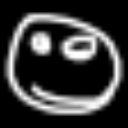

In [2]:
from quickdraw_dataset import QuickDraw
import torchvision.transforms as T

category = Category.FACE

ds = QuickDraw(
    root="dataset", 
    category=category, 
    recognized=True, 
    download=True, 
    transform=T.Resize((128, 128))
)
ds[0][0]

Another example using a string in the category.

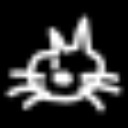

In [3]:
category = Category.FACE

ds = QuickDraw(
    root="dataset", 
    category="cat", 
    recognized=True, 
    download=True, 
    transform=T.Resize((128, 128))
)
ds[0][0]